We want to import censusblocks shp and overlay on the ACL shp data. 

* take census block and census excel data and combine them. 

* within zoning -- extract resdential zones with the zoning codes.


In [7]:
import geopandas as gpd
import os
import getpass
import matplotlib.pyplot as plt
import re

In [8]:
# Find working directory, saves the path while appending the notebooks file name. 
# wd is now the file path to the park-equity-atx directory.
wd = os.getcwd()
wd = wd[:wd.find('notebooks')]
wd

'C:\\Users\\Victoria\\Desktop\\THESIS\\Analysis\\gitproject\\park-equity-atx\\'

In [9]:
acl = gpd.read_file(wd+"data/citylimits/citylimits.shp")

In [10]:
acl

,city_name,jurisdicti,jurisdic_1,jurisdic_2,jurisdic_3,modified_f,objectid,shape_area,shape_leng,geometry
0,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3086815.032605638 10026999.74263538,..."


In [11]:
#Projection for city data is NAD 1983 StatePlane Texas Central FIPS 4203 Feet
acl.crs = {'init': 'epsg:102739'}

Text(0.5, 1, 'Austin City Limits - Full Jurisdiction')

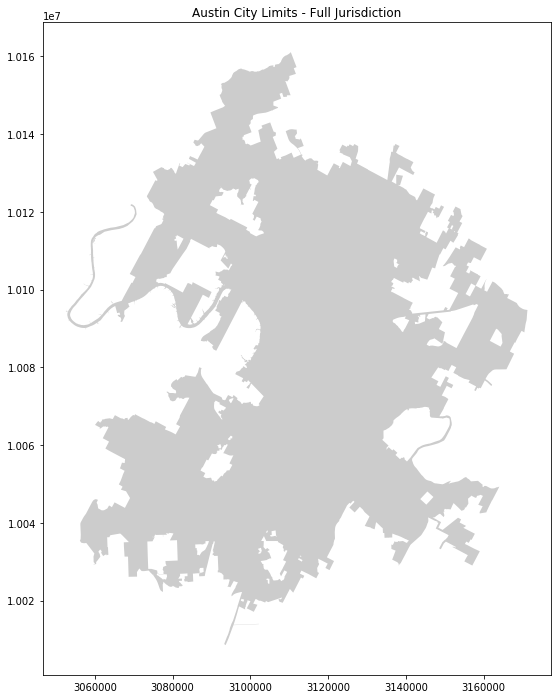

In [7]:
fig1, ax = plt.subplots(figsize=(12,12))
a = acl.plot(ax=ax, color="black", alpha=0.2)
# a = acl.plot(ax=ax, color=None, alpha=1)

plt.title("Austin City Limits - Full Jurisdiction")

In [ ]:
##export to shapefile 
#acl.to_file("test_acl.shp")

In [16]:
censusblocks = gpd.read_file(wd+"data/censusblocks2010/2010 Census Blocks.shp")

In [17]:
censusblocks

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,48,021,950501,1084,480219505011084,Block 1084,G5040,None,None,S,88302.0,0.0,+30.2440455,-097.3206868,"POLYGON ((3247429.311608136 10066855.95115057,..."
1,48,021,950501,1016,480219505011016,Block 1016,G5040,None,None,S,269978.0,0.0,+30.2543835,-097.2558527,"POLYGON ((3268792.360745475 10069865.16986965,..."
2,48,021,950501,1066,480219505011066,Block 1066,G5040,None,None,S,14684.0,0.0,+30.2334597,-097.2729103,"POLYGON ((3262623.121115476 10061369.03758372,..."
3,48,021,950501,1039,480219505011039,Block 1039,G5040,None,None,S,1168008.0,35209.0,+30.2230089,-097.2897090,"POLYGON ((3256433.172209308 10060583.71107039,..."
4,48,021,950501,1017,480219505011017,Block 1017,G5040,None,None,S,1096.0,0.0,+30.2432609,-097.2677017,"POLYGON ((3264466.476352632 10065486.67206497,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34248,48,491,020509,3008,484910205093008,Block 3008,G5040,None,None,S,103914.0,0.0,+30.5158676,-097.7468614,"POLYGON ((3110381.121466219 10161170.6457229, ..."
34249,48,491,021508,2015,484910215082015,Block 2015,G5040,None,None,S,9049.0,0.0,+30.5161450,-097.6554348,"POLYGON ((3139663.432324052 10160956.46997015,..."
34250,48,491,021506,2017,484910215062017,Block 2017,G5040,None,None,S,18895.0,0.0,+30.5483324,-097.6170553,"POLYGON ((3151155.829286724 10173725.23117797,..."
34251,48,491,020708,1027,484910207081027,Block 1027,G5040,None,None,S,0.0,569.0,+30.5020675,-097.6426007,"POLYGON ((3143907.062944382 10156610.06527714,..."


In [18]:
censusblocks.crs = {'init': 'epsg:102739'}

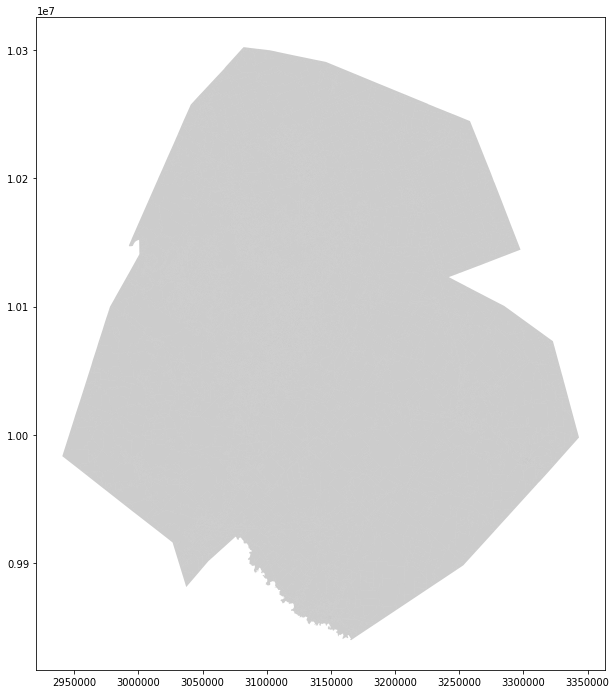

In [19]:
fig2, ax = plt.subplots(figsize=(12,12))
cb = censusblocks.plot(ax=ax, color="black", alpha=0.2)
# cb= censusblocks.plot(ax=ax, color=None, alpha=1)

In [20]:
cbintersection = gpd.overlay(censusblocks, acl, how = 'intersection')

In [21]:
cbintersection 

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,FUNCSTAT10,...,city_name,jurisdicti,jurisdic_1,jurisdic_2,jurisdic_3,modified_f,objectid,shape_area,shape_leng,geometry
83,48,209,010901,1000,482090109011000,Block 1000,G5040,None,None,S,...,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3056196.943745553 10035434.26038514,..."
84,48,209,010901,1004,482090109011004,Block 1004,G5040,None,None,S,...,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3060340.445818823 10029833.26098854,..."
113,48,209,010908,1002,482090109081002,Block 1002,G5040,None,None,S,...,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3093543.514055388 10008616.78846859,..."
121,48,209,010901,1005,482090109011005,Block 1005,G5040,None,None,S,...,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3063053.367280419 10031649.19700599,..."
122,48,209,010901,1037,482090109011037,Block 1037,G5040,None,None,S,...,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3068833.199734814 10026135.52516772,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15898,48,491,020409,2008,484910204092008,Block 2008,G5040,None,None,S,...,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3102398.290647134 10140334.79205348,..."
15901,48,491,020508,1009,484910205081009,Block 1009,G5040,None,None,S,...,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,(POLYGON ((3108511.845748094 10149566.38744315...
15902,48,491,020510,1028,484910205101028,Block 1028,G5040,None,None,S,...,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3106643.396986306 10153534.73054856,..."
15903,48,491,020403,1006,484910204031006,Block 1006,G5040,None,None,S,...,CITY OF AUSTIN,AUSTIN FULL PURPOSE,FULL,FULL PURPOSE,34.0,210.0,110.0,7.752723e+09,2.049691e+06,"POLYGON ((3089604.448452726 10140822.4777579, ..."


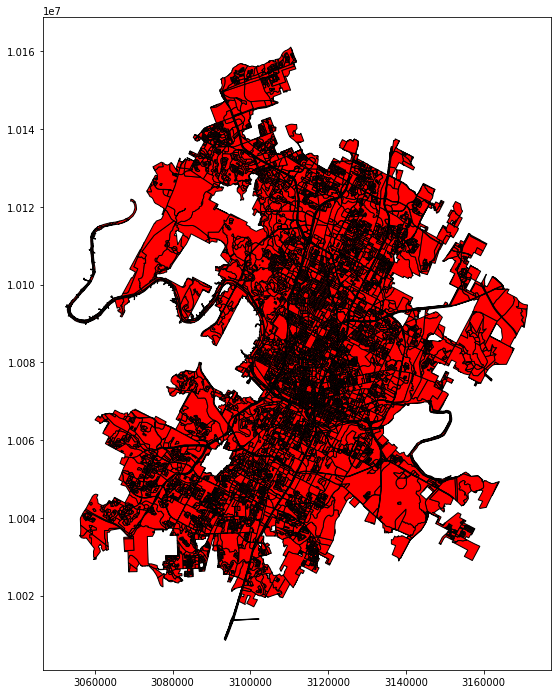

In [34]:

fig3, ax = plt.subplots(figsize=(12,12))
base = cbintersection.plot(ax=ax, color="black", alpha=0.2)
layer = cbintersection["geometry"].plot(ax=base, color='red', edgecolor = 'black')

# cbi = cbintersection.plot(ax=ax, color=None, alpha=1)